# Q
### 1) Extract reviews of any product from ecommerce website like amazon
### 2) Perform emotion mining

#### Importing Libraries 

In [1]:
import pandas as pd
from bs4 import BeautifulSoup as bs
import requests

import re

import text2emotion as te

import matplotlib.pyplot as plt

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\AMD\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\AMD\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\AMD\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
#pip install text2emotion

Note: you may need to restart the kernel to use updated packages.


#### Product Link

In [3]:
amazon='https://www.amazon.in/'
reviews='https://www.amazon.in/product-reviews/B08L5VZKWT/ref=cm_cr_arp_d_viewopt_sr?ie=UTF8&filterByStar=all_stars&reviewerType=all_reviews&pageNumber=1#reviews-filter-bar'

#### Extracting 'Customer Name', 'Review Title', 'Rating', 'Reviews' from webpage

In [4]:
customer_name = []
review_title = []
rate = []
review_content = []

In [5]:
j = 0
while j == 0:
    page = requests.get(reviews)
    while page.ok == False:  
        page = requests.get(reviews)
    
    
    soup = bs(page.content,'html.parser')
    soup.prettify()
    
    names = soup.find_all('span', class_='a-profile-name')
    names.pop(0)
    names.pop(0)
    
    for i in range(0,len(names)):
        customer_name.append(names[i].get_text())
        
    title = soup.find_all("a",{"data-hook":"review-title"})
    for i in range(0,len(title)):
        review_title.append(title[i].get_text())

    rating = soup.find_all('i',class_='review-rating')
    rating.pop(0)
    rating.pop(0)
    for i in range(0,len(rating)):
        rate.append(rating[i].get_text())

    review = soup.find_all("span",{"data-hook":"review-body"})
    for i in range(0,len(review)):
        review_content.append(review[i].get_text())
        
    try:
        for div in soup.findAll('li', attrs={'class':'a-last'}):
            A = div.find('a')['href']
        reviews = amazon + A
    except:
        break

#### Number of records

In [6]:
len(customer_name)

284

In [7]:
len(review_title)

284

In [8]:
len(rate)

284

In [9]:
len(review_content)

284

#### Cleaning data

In [10]:
review_title[:] = [x.strip('\n') for x in review_title]
review_content[:] = [x.strip('\n') for x in review_content]

#### Creating a dataframe

In [11]:
data = pd.DataFrame()

In [12]:
data['Customer Name'] = customer_name
data['Review Title'] = review_title
data['Rating'] = rate
data['Reviews'] = review_content

In [13]:
data

,Customer Name,Review Title,Rating,Reviews
0,Subhash K.,Waste of money.,1.0 out of 5 stars,Over priced. And without charger too.Not rec...
1,Aakash,This took one of my kidneys and a testicle. Bu...,5.0 out of 5 stars,Impressed! I’ve tested it with iphone11 and ...
2,Arjun Menon,The best iPhone in 2020. Phone of the year.,5.0 out of 5 stars,This is the best iPhone yes. The Max model g...
3,Amazon Customer,"Massive Display, Monster Camera! 👌🏽",5.0 out of 5 stars,"Pros: Great display, battery, cameras, usabi..."
4,Sahith,Best & Biggest iPhone i ever owned 🥰,5.0 out of 5 stars,"Just no words, what a beauty. Upgrading from..."
...,...,...,...,...
279,shahamat,Go for it !!,5.0 out of 5 stars,Value for money .. A14 is lit !!! Also d cam...
280,Sanket,Beast at its best,5.0 out of 5 stars,"One word.. ""beast"""
281,Amazon Customer,Most amazing phone,5.0 out of 5 stars,"Amazing phone , best camera and battery life..."
282,Mohit Agarwal,Great Bling Phone,4.0 out of 5 stars,Great phone unfortunately had problems with ...


#### Exporting the dataframe to a csv file

In [14]:
data.to_csv('Amazon_reviews.csv',index = True)

#### Adjoing both 'Review Title' and 'Reviews'

In [15]:
data['text']=data['Review Title']+' '+data['Reviews']

In [16]:
data.head()

,Customer Name,Review Title,Rating,Reviews,text
0,Subhash K.,Waste of money.,1.0 out of 5 stars,Over priced. And without charger too.Not rec...,Waste of money. Over priced. And without cha...
1,Aakash,This took one of my kidneys and a testicle. Bu...,5.0 out of 5 stars,Impressed! I’ve tested it with iphone11 and ...,This took one of my kidneys and a testicle. Bu...
2,Arjun Menon,The best iPhone in 2020. Phone of the year.,5.0 out of 5 stars,This is the best iPhone yes. The Max model g...,The best iPhone in 2020. Phone of the year. ...
3,Amazon Customer,"Massive Display, Monster Camera! 👌🏽",5.0 out of 5 stars,"Pros: Great display, battery, cameras, usabi...","Massive Display, Monster Camera! 👌🏽 Pros: Gr..."
4,Sahith,Best & Biggest iPhone i ever owned 🥰,5.0 out of 5 stars,"Just no words, what a beauty. Upgrading from...",Best & Biggest iPhone i ever owned 🥰 Just no...


#### Data cleaning

In [17]:
re_without_space = re.compile("(\.)|(\,)|(\{)|(\})|(\()|(\))|(\[)|(\])|(\;)|(\:)|(\!)|(\`)|(\')|(\")|(\%)|(\$)|(\<)|(\>)|(\?)|(\|)|")
re_with_space = re.compile("(<br\s/><br\s/?)|(-)|(/)|(:).")
def cleantext(var):
    var = re.sub('[0-9]', '', var)
    var = re.sub(r'https?:\/\/\S+', '', var)
    var = re.sub('_', '', var.lower())
    var = re_without_space.sub('', var)
    var = re_with_space.sub(' ', var)
    return var

In [18]:
data['cleantext']=data['text'].apply(cleantext)

In [19]:
data.head()

,Customer Name,Review Title,Rating,Reviews,text,cleantext
0,Subhash K.,Waste of money.,1.0 out of 5 stars,Over priced. And without charger too.Not rec...,Waste of money. Over priced. And without cha...,waste of money over priced and without charg...
1,Aakash,This took one of my kidneys and a testicle. Bu...,5.0 out of 5 stars,Impressed! I’ve tested it with iphone11 and ...,This took one of my kidneys and a testicle. Bu...,this took one of my kidneys and a testicle but...
2,Arjun Menon,The best iPhone in 2020. Phone of the year.,5.0 out of 5 stars,This is the best iPhone yes. The Max model g...,The best iPhone in 2020. Phone of the year. ...,the best iphone in phone of the year this i...
3,Amazon Customer,"Massive Display, Monster Camera! 👌🏽",5.0 out of 5 stars,"Pros: Great display, battery, cameras, usabi...","Massive Display, Monster Camera! 👌🏽 Pros: Gr...",massive display monster camera 👌🏽 pros great...
4,Sahith,Best & Biggest iPhone i ever owned 🥰,5.0 out of 5 stars,"Just no words, what a beauty. Upgrading from...",Best & Biggest iPhone i ever owned 🥰 Just no...,best & biggest iphone i ever owned 🥰 just no...


#### Emotional Analysis

In [20]:

def happy(var):
    e = te.get_emotion(var)
    return e.get('Happy')

def angry(var):
    e = te.get_emotion(var)
    return e.get('Angry')

def fear(var):
    e = te.get_emotion(var)
    return e.get('Fear')

def sad(var):
    e = te.get_emotion(var)
    return e.get('Sad')

def surprise(var):
    e = te.get_emotion(var)
    return e.get('Surprise')


In [21]:
data['Happy']=data['cleantext'].apply(happy)
data['Angry']=data['cleantext'].apply(angry)
data['Fear']=data['cleantext'].apply(fear)
data['Sad']=data['cleantext'].apply(sad)
data['Surprise']=data['cleantext'].apply(surprise)

In [22]:
data.head()

,Customer Name,Review Title,Rating,Reviews,text,cleantext,Happy,Angry,Fear,Sad,Surprise
0,Subhash K.,Waste of money.,1.0 out of 5 stars,Over priced. And without charger too.Not rec...,Waste of money. Over priced. And without cha...,waste of money over priced and without charg...,0.00,0.00,0.00,1.00,0.00
1,Aakash,This took one of my kidneys and a testicle. Bu...,5.0 out of 5 stars,Impressed! I’ve tested it with iphone11 and ...,This took one of my kidneys and a testicle. Bu...,this took one of my kidneys and a testicle but...,0.18,0.00,0.18,0.35,0.29
2,Arjun Menon,The best iPhone in 2020. Phone of the year.,5.0 out of 5 stars,This is the best iPhone yes. The Max model g...,The best iPhone in 2020. Phone of the year. ...,the best iphone in phone of the year this i...,0.07,0.00,0.50,0.21,0.21
3,Amazon Customer,"Massive Display, Monster Camera! 👌🏽",5.0 out of 5 stars,"Pros: Great display, battery, cameras, usabi...","Massive Display, Monster Camera! 👌🏽 Pros: Gr...",massive display monster camera 👌🏽 pros great...,0.25,0.00,0.50,0.25,0.00
4,Sahith,Best & Biggest iPhone i ever owned 🥰,5.0 out of 5 stars,"Just no words, what a beauty. Upgrading from...",Best & Biggest iPhone i ever owned 🥰 Just no...,best & biggest iphone i ever owned 🥰 just no...,0.18,0.09,0.18,0.18,0.36


#### Output data 

In [23]:
final = data.drop(['text','cleantext'], axis=1)

final.to_csv('Emotional Analysis of Reviews.csv', index=True)

#### Visualizing emotions of reviews 

In [24]:
happy_score=data['Happy'].sum()
angry_score=data['Angry'].sum()
fear_score=data['Fear'].sum()
sad_score=data['Sad'].sum()
surprise_score=data['Surprise'].sum()

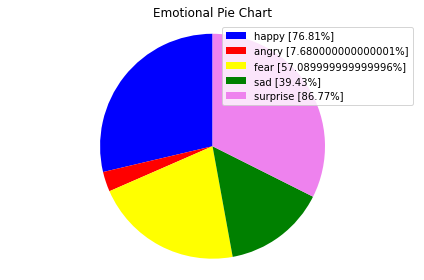

In [25]:
labels = ['happy ['+str(happy_score)+'%]', 'angry ['+str(angry_score)+'%]', 
'fear ['+str(fear_score)+'%]','sad ['+str(sad_score)+'%]','surprise ['+str(surprise_score)+'%]']

total=[happy_score,angry_score,fear_score,sad_score,surprise_score]

colors = ['blue','red','yellow','green','violet']
patches, texts = plt.pie(total, colors=colors, startangle=90)
plt.legend(patches,labels,loc="best")
plt.title("Emotional Pie Chart")
plt.axis('equal')
plt.tight_layout()


#### We concur that most of the people have given a highly positive review for the LED smart TV and about half of them are sensing a fear about the product.